# Get Features

The purpose of this notebook is to extract features from audio files containing simple word commands

In [1]:
from pydub import AudioSegment
import librosa
from librosa import display
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import pickle
import os.path
import numpy as np

In [9]:
test = combined.export('test.wav',format="wav")

In [39]:
test

<_io.BufferedRandom name='test.wav'>

In [10]:
y,s=librosa.load('test.wav')

In [11]:
import os 
os.remove("test.wav")

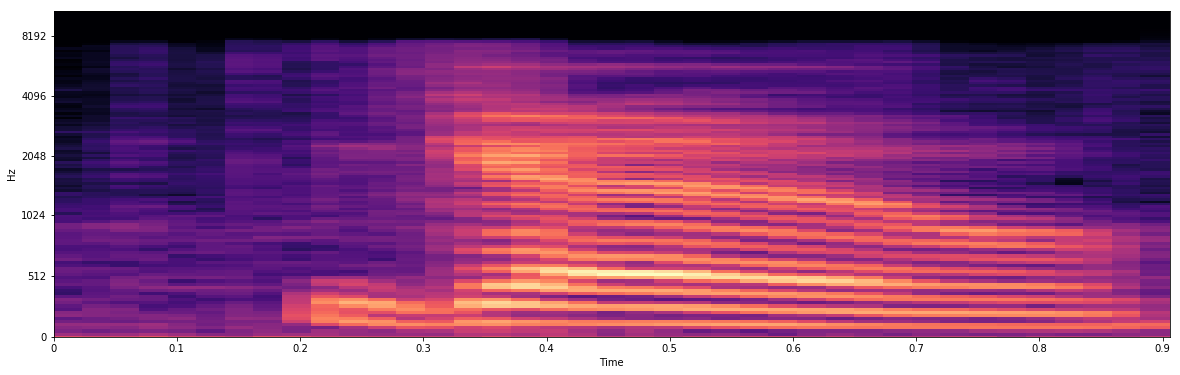

In [12]:
M = librosa.feature.melspectrogram(y=y,n_mels=128)
P=librosa.power_to_db(M, ref=np.max)
plt.figure(figsize=(20, 6))
librosa.display.specshow(P, y_axis='mel', x_axis='time');

In [3]:
folders = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
# background1 = AudioSegment.from_file("/Users/adamsantos/ds/metis/Final/train/audio/_background_noise_/doing_the_dishes.wav")
# background2 = AudioSegment.from_file("/Users/adamsantos/ds/metis/Final/train/audio/_background_noise_/dude_miaowing.wav")
# background3 = AudioSegment.from_file("/Users/adamsantos/ds/metis/Final/train/audio/_background_noise_/exercise_bike.wav")
# background4 = AudioSegment.from_file("/Users/adamsantos/ds/metis/Final/train/audio/_background_noise_/pink_noise.wav")
# background5 = AudioSegment.from_file("/Users/adamsantos/ds/metis/Final/train/audio/_background_noise_/running_tap.wav")
# background6 = AudioSegment.from_file("/Users/adamsantos/ds/metis/Final/train/audio/_background_noise_/white_noise.wav")

In [14]:
backgrounds=[background1,background2,background3,background4,background5,background6]

## Get features from clip

In [2]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += (window_size / 2)

def process_sounds(signal,bands):
    melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
    #chroma = librosa.feature.chroma_cqt(signal,n_chroma=bands)
    #mfcc = librosa.feature.mfcc(signal, n_mfcc=bands)
    logspec = librosa.power_to_db(melspec, ref=np.max)
    #logchrom = librosa.power_to_db(chroma, ref=np.max)
    #logmfcc = librosa.power_to_db(mfcc, ref=np.max)
    logspec = logspec.T.flatten()[:, np.newaxis].T
    #logchrom = logchrom.T.flatten()[:, np.newaxis].T
    #logmfcc = logmfcc.T.flatten()[:, np.newaxis].T
    #chroms.append(logchrom)
    return logspec
        

def extract_features(parent_dir,sub_dirs,file_ext="*.wav",bands = 128, frames = 41):
    window_size = 512 * (frames - 1)
    log_specgrams = []
    labels = []
    chroms=[]
    mfccs=[]
    for l, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            sound_clip,s = librosa.load(fn)
            #label = sub_dir
            label = sub_dir
            for (start,end) in windows(sound_clip,window_size):
                if(len(sound_clip[start:end]) == window_size):
                    signal = sound_clip[start:end]
                    logspec = process_sounds(signal,bands)
                    log_specgrams.append(logspec)
                    #mfccs.append(logmfcc)
                    labels.append(label)
#             for background in backgrounds:
#                 sound1 = AudioSegment.from_file(fn)
#                 combined = sound1.overlay(background)
#                 test = combined.export('test.wav',format="wav")
#                 sound_clip,s = librosa.load('test.wav')
#                 label = sub_dir
#                 for (start,end) in windows(sound_clip,window_size):
#                     if(len(sound_clip[start:end]) == window_size):
#                         signal = sound_clip[start:end]
#                         logspec = process_sounds(signal,bands)
#                         log_specgrams.append(logspec)
#                         #mfccs.append(logmfcc)
#                         labels.append(label)
            
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    #chroms = np.asarray(chroms).reshape(len(chroms),bands,frames,1)
    #mfccs = np.asarray(mfccs).reshape(len(mfccs),bands,frames,1)
    #features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
    #features = np.concatenate((features, np.zeros(np.shape(log_specgrams))), axis = 3)
    #features = np.concatenate((log_specgrams, chroms), axis = 3)
    #features = np.concatenate((features, mfccs), axis = 3)
    
    
    return np.array(log_specgrams), np.array(labels)


## Get features from left, right, stop, go

In [10]:
parent_dir = r'/home/ubuntu/Final/train/audio/'
left= ['left']
right=['right']
stop=['stop']
go=['go']

left_features,left_labels = extract_features(parent_dir,left)
right_features,right_labels = extract_features(parent_dir,right)
stop_features,stop_labels = extract_features(parent_dir,stop)
go_features,go_labels = extract_features(parent_dir,go)

In [11]:
filename = 'left_mfcc_features.pkl'
pickle.dump(left_features, open(filename, 'wb'))
filename = 'left_mfcc_labels.pkl'
pickle.dump(left_labels, open(filename, 'wb'))
filename = 'right_mfcc_features.pkl'
pickle.dump(right_features, open(filename, 'wb'))
filename = 'right_mfcc_labels.pkl'
pickle.dump(right_labels, open(filename, 'wb'))
filename = 'stop_mfcc_features.pkl'
pickle.dump(stop_features, open(filename, 'wb'))
filename = 'stop_mfcc_labels.pkl'
pickle.dump(stop_labels, open(filename, 'wb'))
filename = 'go_mfcc_features.pkl'
pickle.dump(go_features, open(filename, 'wb'))
filename = 'go_mfcc_labels.pkl'
pickle.dump(go_labels, open(filename, 'wb'))

## Get features from the rest of the labels

In [3]:
subs= [['happy'], ['wow'],['one'],['two'],['three'],['zero']]

In [4]:
new_feats=[]
new_labels=[]
parent_dir = r'/home/ubuntu/Final/train/audio/'
for sub in subs:
    feats,label = extract_features(parent_dir,sub)
    new_feats.append(feats)
    new_labels.append(label)

In [5]:
for i,item in enumerate(new_labels):
    filename = 'No_Background_Files/'+str(subs[i][0])+'_labels.pkl'
    pickle.dump(item, open(filename, 'wb'))

In [6]:
for i,item in enumerate(new_feats):
    filename = 'No_Background_Files/'+str(subs[i][0])+'_features.pkl'
    pickle.dump(item, open(filename, 'wb'))

## Get features from unknown folders

In [3]:
unknowns = [['bed'],['bird'],['cat'],['dog'],['bird'],['one'],['two'],['three'],['four'],['five'],['six']
           ,['seven'],['eight'],['nine'],['zero'],['bird'],['happy'],['house'],['marvin'],['sheila']
           ,['tree'],['wow']]

In [4]:
new_feats=[]
new_labels=[]
parent_dir = r'/home/ubuntu/Final/train/audio/'
for sub in unknowns:
    feats,label = extract_features(parent_dir,sub)
    new_feats.append(feats)
    new_labels.append(label)

In [5]:
for i,item in enumerate(new_labels):
    filename = 'No_Background_Files/unknowns/'+str(unknowns[i][0])+'labels.pkl'
    pickle.dump(item, open(filename, 'wb'))

In [6]:
for i,item in enumerate(new_feats):
    filename = 'No_Background_Files/unknowns/'+str(unknowns[i][0])+'features.pkl'
    pickle.dump(item, open(filename, 'wb'))

## Get features from silence tracks

In [21]:
silences = [['silence']]

In [22]:
new_feats=[]
new_labels=[]
parent_dir = r'/home/ubuntu/Final/train/audio/_background_noise_'
for sub in silences:
    feats,label = extract_features(parent_dir,sub)
    new_feats.append(feats)
    new_labels.append(label)

In [23]:
for i,item in enumerate(new_labels):
    filename = 'No_Background_Files/'+str(silences[i][0])+'labels.pkl'
    pickle.dump(item, open(filename, 'wb'))

In [24]:
for i,item in enumerate(new_feats):
    filename = 'No_Background_Files/'+str(silences[i][0])+'features.pkl'
    pickle.dump(item, open(filename, 'wb'))

In [25]:
len(feats)

1973

## Get features from Test tracks

In [3]:
new_feats=[]
new_labels=[]
parent_dir = r'/home/ubuntu/Final/'
tests = [['test_files']]
for sub in tests:
    feats,label = extract_features(parent_dir,sub)
    new_feats.append(feats)
    new_labels.append(label)

In [4]:
for i,item in enumerate(new_labels):
    filename = str(tests[i][0])+'_labels.pkl'
    pickle.dump(item, open(filename, 'wb'))

In [5]:
for i,item in enumerate(new_feats):
    filename = str(tests[i][0])+'_features.pkl'
    pickle.dump(item, open(filename, 'wb'))

OverflowError: cannot serialize a bytes object larger than 4 GiB